### 데이터 전처리

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
movies = pd.read_csv('/content/drive/MyDrive/IMbank_추천시스템/추천시스템 실습 데이터/data/movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
movies.columns

# 'movieId' - > 영화 일련 번호, 'title', 'genres'

Index(['movieId', 'title', 'genres'], dtype='object')

In [6]:
ratings = pd.read_csv('/content/drive/MyDrive/IMbank_추천시스템/추천시스템 실습 데이터/data/ratings.csv')

ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51
...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22
100832,610,168248,5.0,2017-05-03 22:21:31
100833,610,168250,5.0,2017-05-08 19:50:47
100834,610,168252,5.0,2017-05-03 21:19:12


In [7]:
ratings.columns

# 'userId', 'movieId', 'rating', 'timestamp' -> 1970년도 부터 1초씩 센 합

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [8]:
movies_genres= movies[['movieId','genres']]
movies_genres

,movieId,genres
0,1,Adventure|Animation|Children|Comedy|Fantasy
1,2,Adventure|Children|Fantasy
2,3,Comedy|Romance
3,4,Comedy|Drama|Romance
4,5,Comedy
...,...,...
9737,193581,Action|Animation|Comedy|Fantasy
9738,193583,Animation|Comedy|Fantasy
9739,193585,Drama
9740,193587,Action|Animation


In [9]:
movies_genres= movies[['movieId','genres']]
movies_genres['genres'] = movies_genres['genres'].str.split('|')

moives_genres=movies_genres.explode('genres')
moives_genres

,movieId,genres
0,1,Adventure
0,1,Animation
0,1,Children
0,1,Comedy
0,1,Fantasy
...,...,...
9738,193583,Fantasy
9739,193585,Drama
9740,193587,Action
9740,193587,Animation


In [10]:
movies_genres_dummies = pd.get_dummies(moives_genres, columns=['genres'])
movies_genres_dummies = movies_genres_dummies.groupby('movieId').sum()
movies_genres_dummies.reset_index(inplace=True)
movies_genres_dummies

,movieId,genres_(no genres listed),genres_Action,genres_Adventure,genres_Animation,genres_Children,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,...,genres_Film-Noir,genres_Horror,genres_IMAX,genres_Musical,genres_Mystery,genres_Romance,genres_Sci-Fi,genres_Thriller,genres_War,genres_Western
0,1,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9738,193583,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9740,193587,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
movies_names = {}

for i in range(len(movies)):
    a = movies.iloc[i]
    # print(a)
    movies_names[a['movieId']] = a['title']

movies_names

{1: 'Toy Story (1995)',
 2: 'Jumanji (1995)',
 3: 'Grumpier Old Men (1995)',
 4: 'Waiting to Exhale (1995)',
 5: 'Father of the Bride Part II (1995)',
 6: 'Heat (1995)',
 7: 'Sabrina (1995)',
 8: 'Tom and Huck (1995)',
 9: 'Sudden Death (1995)',
 10: 'GoldenEye (1995)',
 11: 'American President, The (1995)',
 12: 'Dracula: Dead and Loving It (1995)',
 13: 'Balto (1995)',
 14: 'Nixon (1995)',
 15: 'Cutthroat Island (1995)',
 16: 'Casino (1995)',
 17: 'Sense and Sensibility (1995)',
 18: 'Four Rooms (1995)',
 19: 'Ace Ventura: When Nature Calls (1995)',
 20: 'Money Train (1995)',
 21: 'Get Shorty (1995)',
 22: 'Copycat (1995)',
 23: 'Assassins (1995)',
 24: 'Powder (1995)',
 25: 'Leaving Las Vegas (1995)',
 26: 'Othello (1995)',
 27: 'Now and Then (1995)',
 28: 'Persuasion (1995)',
 29: 'City of Lost Children, The (Cité des enfants perdus, La) (1995)',
 30: 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 31: 'Dangerous Minds (1995)',
 32: 'Twelve Monkeys (a.k.a. 12 Monkeys) (199

In [12]:
df = ratings.merge(movies_genres_dummies, on='movieId')
df

,userId,movieId,rating,timestamp,genres_(no genres listed),genres_Action,genres_Adventure,genres_Animation,genres_Children,genres_Comedy,...,genres_Film-Noir,genres_Horror,genres_IMAX,genres_Musical,genres_Mystery,genres_Romance,genres_Sci-Fi,genres_Thriller,genres_War,genres_Western
0,1,1,4.0,2000-07-30 18:45:03,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,5,1,4.0,1996-11-08 06:36:02,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,7,1,4.5,2005-01-25 06:52:26,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,15,1,2.5,2017-11-13 12:59:30,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,17,1,4.5,2011-05-18 05:28:03,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,2016-11-19 08:55:49,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100832,610,160527,4.5,2016-11-19 08:43:18,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100833,610,160836,3.0,2017-05-03 20:53:14,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
100834,610,163937,3.5,2017-05-03 21:59:49,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


### 추천 시스템 구현

In [13]:
user = 1

sample = df[df['userId']==user]
sample

,userId,movieId,rating,timestamp,genres_(no genres listed),genres_Action,genres_Adventure,genres_Animation,genres_Children,genres_Comedy,...,genres_Film-Noir,genres_Horror,genres_IMAX,genres_Musical,genres_Mystery,genres_Romance,genres_Sci-Fi,genres_Thriller,genres_War,genres_Western
0,1,1,4.0,2000-07-30 18:45:03,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
215,1,3,4.0,2000-07-30 18:20:47,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
267,1,6,4.0,2000-07-30 18:37:04,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
369,1,47,5.0,2000-07-30 19:03:35,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
572,1,50,5.0,2000-07-30 18:48:51,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16056,1,3744,4.0,2000-07-30 18:11:34,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16075,1,3793,5.0,2000-07-30 18:30:55,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
16208,1,3809,4.0,2000-07-30 18:20:20,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16243,1,4006,4.0,2000-07-30 18:48:23,0,0,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0


In [14]:
movie_list = sample['movieId'].tolist() # user 1이 본 movieId 리스트로 저장
print(movie_list)

[1, 3, 6, 47, 50, 70, 101, 110, 151, 157, 163, 216, 223, 231, 235, 260, 296, 316, 333, 349, 356, 362, 367, 423, 441, 457, 480, 500, 527, 543, 552, 553, 590, 592, 593, 596, 608, 648, 661, 673, 733, 736, 780, 804, 919, 923, 940, 943, 954, 1009, 1023, 1024, 1025, 1029, 1030, 1031, 1032, 1042, 1049, 1060, 1073, 1080, 1089, 1090, 1092, 1097, 1127, 1136, 1196, 1197, 1198, 1206, 1208, 1210, 1213, 1214, 1219, 1220, 1222, 1224, 1226, 1240, 1256, 1258, 1265, 1270, 1275, 1278, 1282, 1291, 1298, 1348, 1377, 1396, 1408, 1445, 1473, 1500, 1517, 1552, 1573, 1580, 1587, 1617, 1620, 1625, 1644, 1676, 1732, 1777, 1793, 1804, 1805, 1920, 1927, 1954, 1967, 2000, 2005, 2012, 2018, 2028, 2033, 2046, 2048, 2054, 2058, 2078, 2090, 2093, 2094, 2096, 2099, 2105, 2115, 2116, 2137, 2139, 2141, 2143, 2161, 2174, 2193, 2253, 2268, 2273, 2291, 2329, 2338, 2353, 2366, 2387, 2389, 2395, 2406, 2414, 2427, 2450, 2459, 2470, 2478, 2492, 2502, 2528, 2529, 2542, 2571, 2580, 2596, 2616, 2617, 2628, 2640, 2641, 2644, 2648, 2

In [15]:
target_movie = movies_genres_dummies[~movies_genres_dummies['movieId'].isin(movie_list)] # user 1이 보지 않은 영화 추출
target_movie

,movieId,genres_(no genres listed),genres_Action,genres_Adventure,genres_Animation,genres_Children,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,...,genres_Film-Noir,genres_Horror,genres_IMAX,genres_Musical,genres_Mystery,genres_Romance,genres_Sci-Fi,genres_Thriller,genres_War,genres_Western
1,2,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,8,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9738,193583,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9740,193587,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = sample.iloc[:,4:].to_numpy()
Y = sample['rating'].to_numpy()

train_x,test_x,train_y,test_y = train_test_split(X,Y)

model = LinearRegression()
model.fit(train_x,train_y)

abs(test_y - model.predict(test_x)).mean()

0.6515623235611435

In [17]:
model.fit(X,Y)

LinearRegression()

In [19]:
total = []

for i in range(len(target_movie)):
    a = target_movie.iloc[i]
    idx = a['movieId']
    # print(idx)
    b = a[1:].to_numpy()  # 필요하지 않은 열을 제거한 후 배열로 변환

    # print(b)

    pred = model.predict([b])[0]
    pred = max(1,min(5,pred))
    # print(pred)

    total.append([movies_names[idx],pred])

In [20]:
result = pd.DataFrame(total,columns=['추천영화','예측평점']).sort_values(by='예측평점',ascending=False)
result.sort_values(by='예측평점',ascending=False)

,추천영화,예측평점
5554,"Trou, Le (Hole, The) (Night Watch, The) (1960)",5.000000
5012,Angels with Dirty Faces (1938),5.000000
5626,"Man Who Planted Trees, The (Homme qui plantait...",5.000000
5199,"Stranger, The (1946)",5.000000
1100,Hoodlum (1997),5.000000
...,...,...
5913,Pulse (2006),2.950492
2639,Phantasm II (1988),2.939157
6561,"Machine Girl, The (Kataude mashin gâru) (2008)",2.924818
5570,Night Watch (Nochnoy dozor) (2004),2.822516


### 실습

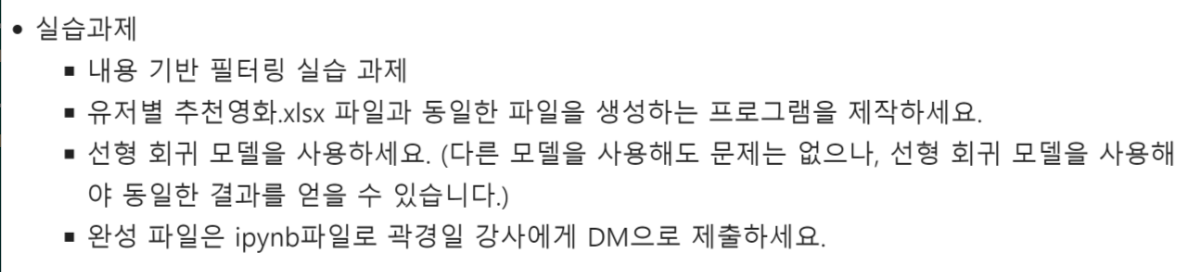

#### 개별 유저학습

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tqdm import tqdm  # tqdm 추가

# 데이터 불러오기 및 전처리
movies = pd.read_csv('/content/drive/MyDrive/IMbank_추천시스템/추천시스템 실습 데이터/data/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/IMbank_추천시스템/추천시스템 실습 데이터/data/ratings.csv')
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

# 장르 전처리
movies_genres = movies[['movieId', 'genres']]
movies_genres['genres'] = movies_genres['genres'].str.split('|')
movies_genres = movies_genres.explode('genres')

# 더미 변수화
movies_genres_dummies = pd.get_dummies(movies_genres, columns=['genres'])
movies_genres_dummies = movies_genres_dummies.groupby('movieId').sum()
movies_genres_dummies.reset_index(inplace=True)

# 영화 제목 매핑
movies_names = {}
for i in range(len(movies)):
    a = movies.iloc[i]
    movies_names[a['movieId']] = a['title']

# 유저별 영화 추천
df = ratings.merge(movies_genres_dummies, on='movieId')

# 전체 유저별로 반복 (tqdm 추가)
total_recommendations = []

for user in tqdm(df['userId'].unique(), desc="유저별 추천 진행 중"):  # tqdm으로 진행 상황 표시
    sample = df[df['userId'] == user]
    movie_list = sample['movieId'].tolist()  # 유저가 본 영화 리스트

    # 예측 모델 학습
    X = sample.iloc[:, 4:].to_numpy()  # 영화 장르 등의 특성
    Y = sample['rating'].to_numpy()  # 유저의 평점
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)

    model = LinearRegression()
    model.fit(train_x, train_y)

    # 유저가 보지 않은 영화 추출
    target_movie = movies_genres_dummies[~movies_genres_dummies['movieId'].isin(movie_list)]

    # 추천 영화 예측
    recommendations = []
    for i in range(len(target_movie)):
        a = target_movie.iloc[i]
        idx = a['movieId']
        b = a[1:].to_numpy()  # 영화 장르 특성

        pred = model.predict([b])[0]
        pred = max(1, min(5, pred))  # 평점은 1 ~ 5 사이로 제한
        recommendations.append([movies_names[idx], pred])

    # 상위 3개 영화 추천
    result = pd.DataFrame(recommendations, columns=['추천영화', '예측평점']).sort_values(by='예측평점', ascending=False)
    top_3_movies = result.head(3)

    # 결과 저장
    total_recommendations.append([user, top_3_movies.iloc[0]['추천영화'], top_3_movies.iloc[1]['추천영화'], top_3_movies.iloc[2]['추천영화']])

# 추천 결과 출력
recommendation_df = pd.DataFrame(total_recommendations, columns=['유저', '추천영화1', '추천영화2', '추천영화3'])
recommendation_df


<ipython-input-9-0875d79eb473>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_genres['genres'] = movies_genres['genres'].str.split('|')
유저별 추천 진행 중: 100%|██████████| 610/610 [24:49<00:00,  2.44s/it]


,유저,추천영화1,추천영화2,추천영화3
0,1,High and Low (Tengoku to jigoku) (1963),"Star Is Born, A (1954)",Notorious (2009)
1,5,"Fountain, The (2006)",Idlewild (2006),"Runaways, The (2010)"
2,7,"Legend of Sleepy Hollow, The (1949)","Prince of Egypt, The (1998)",American Pop (1981)
3,15,Wings of Honneamise (Ôritsu uchûgun Oneamisu n...,Voices of a Distant Star (Hoshi no koe) (2003),"Girl Who Leapt Through Time, The (Toki o kaker..."
4,17,Blood Diamond (2006),"Horse Soldiers, The (1959)",The Dark Tower (2017)
...,...,...,...,...
605,506,"City of the Living Dead (a.k.a. Gates of Hell,...",Scary Movie (2000),Saw IV (2007)
606,397,Ant-Man (2015),Persuasion (2007),"Eagle Has Landed, The (1976)"
607,556,Toy Story (1995),Moana (2016),Green Lantern: First Flight (2009)
608,175,3 Extremes (Three... Extremes) (Saam gaang yi)...,Black Tar Heroin: The Dark End of the Street (...,Winchester '73 (1950)


#### 학습데이터 100으로 줄임 , 전체 유저학습으로 변경

In [7]:
## 시간 오래 걸려서 개별 유저 학습에서  -> 전체 유저 학습 , 학습 100명만 사용
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# 데이터 불러오기 및 전처리
movies = pd.read_csv('/content/drive/MyDrive/IMbank_추천시스템/추천시스템 실습 데이터/data/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/IMbank_추천시스템/추천시스템 실습 데이터/data/ratings.csv')
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

# 장르 전처리
movies_genres = movies[['movieId', 'genres']]
movies_genres['genres'] = movies_genres['genres'].str.split('|')
movies_genres = movies_genres.explode('genres')

# 더미 변수화
movies_genres_dummies = pd.get_dummies(movies_genres, columns=['genres'])
movies_genres_dummies = movies_genres_dummies.groupby('movieId').sum()
movies_genres_dummies.reset_index(inplace=True)

# 영화 제목 매핑
movies_names = {}
for i in range(len(movies)):
    a = movies.iloc[i]
    movies_names[a['movieId']] = a['title']

# # 전체 유저를 대상으로 공통 모델 학습
# df = ratings.merge(movies_genres_dummies, on='movieId')

# 전체 유저를 대상으로 공통 모델 학습 (100명의 유저만 선택)
selected_users = df['userId'].unique()[:100]  # 유저 100명 선택
df_100 = df[df['userId'].isin(selected_users)]  # 100명의 유저 데이터만 선택

# 예측 모델 학습 (100명의 유저 대상으로)
X = df_100.iloc[:, 5:].to_numpy()  # 영화 장르 등의 특성 (userId, movieId 제외)
Y = df_100['rating'].to_numpy()  # 평점
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)

model = LinearRegression()
model.fit(train_x, train_y)

# 유저별 영화 추천
total_recommendations = []
users = df_100['userId'].unique()  # 100명의 유저 리스트

# tqdm으로 유저별 영화 추천 진행 상황 표시
for user in tqdm(users, desc="Processing Users"):
    sample = df_100[df_100['userId'] == user]
    movie_list = sample['movieId'].tolist()  # 유저가 본 영화 리스트

    # 유저가 보지 않은 영화 추출
    target_movie = movies_genres_dummies[~movies_genres_dummies['movieId'].isin(movie_list)]

    # 추천 영화 예측
    recommendations = []
    for i in range(len(target_movie)):
        a = target_movie.iloc[i]
        idx = a['movieId']
        b = a[1:-1].to_numpy()  # 필요하지 않은 열을 제거한 후 배열로 변환  # 영화 장르 특성

        pred = model.predict([b])[0]
        pred = max(1, min(5, pred))  # 평점은 1 ~ 5 사이로 제한
        recommendations.append([movies_names[idx], pred])

    # 상위 3개 영화 추천
    result = pd.DataFrame(recommendations, columns=['추천영화', '예측평점']).sort_values(by='예측평점', ascending=False)
    top_3_movies = result.head(3)

    # 결과 저장
    total_recommendations.append([user, top_3_movies.iloc[0]['추천영화'], top_3_movies.iloc[1]['추천영화'], top_3_movies.iloc[2]['추천영화']])

# 추천 결과 출력
recommendation_df = pd.DataFrame(total_recommendations, columns=['유저', '추천영화1', '추천영화2', '추천영화3'])
recommendation_df

<ipython-input-7-3c966fcc1523>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_genres['genres'] = movies_genres['genres'].str.split('|')
Processing Users: 100%|██████████| 100/100 [04:16<00:00,  2.57s/it]


,유저,추천영화1,추천영화2,추천영화3
0,1,"Green Hornet, The (2011)",Cirque du Freak: The Vampire's Assistant (2009),Hancock (2008)
1,5,"Green Hornet, The (2011)",Cirque du Freak: The Vampire's Assistant (2009),"Mummy, The (1999)"
2,7,"Green Hornet, The (2011)","Mummy, The (1999)",Cirque du Freak: The Vampire's Assistant (2009)
3,15,"Green Hornet, The (2011)","Mummy, The (1999)",Cirque du Freak: The Vampire's Assistant (2009)
4,17,"Green Hornet, The (2011)","Mummy, The (1999)",Cirque du Freak: The Vampire's Assistant (2009)
...,...,...,...,...
95,269,"Green Hornet, The (2011)",Cirque du Freak: The Vampire's Assistant (2009),"Mummy, The (1999)"
96,270,"Green Hornet, The (2011)","Mummy, The (1999)",Cirque du Freak: The Vampire's Assistant (2009)
97,273,"Green Hornet, The (2011)","Mummy, The (1999)",Cirque du Freak: The Vampire's Assistant (2009)
98,274,"Green Hornet, The (2011)",Cirque du Freak: The Vampire's Assistant (2009),Monday (2000)


### 실습 풀이

- 내용 기반 추천 장/단점

장점 : 상품을 추천할 때 다른 유저 데이터가 필요하지 않다. , 새롭게 출시한 상품이나, 인기가 없는 상품을 추천할 수 있다.


단점 : 적합한 속성을 고르는 것이 어렵다. , 유저가 준 데이터를 벗어나는 추천을 할 수 없다. 인기가 많은 상품들을 더 추천해 줄 수 없다.

In [24]:
total_result = []

for i in sorted(ratings['userId'].unique()[:10]):
    sample = df[df["userId"] == i]

    movie_list = sample['movieId'].tolist()
    target_movie = movies_genres_dummies[~movies_genres_dummies['movieId'].isin(movie_list)]

    X = sample.iloc[:, 4:].to_numpy()
    Y = sample['rating'].to_numpy()

    model = LinearRegression()
    model.fit(X, Y)

    total = []

    for j in range(len(target_movie)):
        a = target_movie.iloc[j]
        idx = a['movieId']
        b = a[1:]

        pred = model.predict([b])[0]
        pred = max(1, min(5, pred))
        total.append([movies_names[idx], pred])

    result = pd.DataFrame(total, columns = ['추천영화', '예측평점'])
    result = result.sort_values("예측평점", ascending = False)
    result = result.head(3)

    total_result.append([i] + result['추천영화'].to_list())

In [25]:
pd.DataFrame(total_result, columns = ['유저', '추천영화1', '추천영화2', '추천영화3'])

,유저,추천영화1,추천영화2,추천영화3
0,1,"Trou, Le (Hole, The) (Night Watch, The) (1960)","Letter, The (1940)",Persepolis (2007)
1,2,Double Dragon (1994),The Island (2006),Doubt (2008)
2,3,"Ring, The (2002)","Last Wave, The (1977)",Pathology (2008)
3,4,Frozen (2013),"Prince of Egypt, The (1998)",Allegro non troppo (1977)
4,5,"Pom Poko (a.k.a. Raccoon War, The) (Heisei tan...",Flushed Away (2006),"Private Life of Sherlock Holmes, The (1970)"
5,6,Harry Potter and the Deathly Hallows: Part 2 (...,"Bourne Legacy, The (2012)",Northwest Passage (1940)
6,7,"Legend of Sleepy Hollow, The (1949)","Haunted World of El Superbeasto, The (2009)",Watchmen: Tales of the Black Freighter (2009)
7,8,The Hound of the Baskervilles (1988),London Boulevard (2010),Walk the Line (2005)
8,9,Toy Story (1995),Rising Sun (1993),"Darjeeling Limited, The (2007)"
9,10,Princess Mononoke (Mononoke-hime) (1997),Fullmetal Alchemist the Movie: Conqueror of Sh...,Dragon Ball Z: Resurrection of F (2015)
